In [1]:
# Imports

from math import *
import pandas as pd
from scipy.interpolate import RegularGridInterpolator as RGI
import numpy as np
import matplotlib.pyplot as plt
import os

print("Esperamos trabalhar no diretório: "+str(os.getcwd()))

Esperamos trabalhar no diretório: C:\Users\henriquegos\Desktop\Python


In [2]:
# Data

data = pd.read_excel("C:/Users/henriquegos/Desktop/VPDTABLEPASTA/VPDTABLE.xlsx")

# Limpeza da tabela

data = data.iloc[3:24,0:14]
data.columns = ["Temperatura\Humidade","35%","40%","45%","50%","55%","60%","65%","70%","75%","80%","85%","90%","95%"]

#Tranformando os valores de VPD em vetores
VPD = data.iloc[1:21,1:14].to_numpy()

#Eixo Y e EixoVPD
TemperaturaDados = np.arange(15,36,1)

diffs = 21
i_temp = 0

Humidade, Temperatura = float(input("Qual a humidade do seu grow? Digite um valor entre 35 e 95: ")), float(input("Qual a temperatura do seu grow? Digite um valor entre 15 e 35: "))

cond = input("Qual o status do seu cultivo? Vegetativo ou Floração? ").lower()

for i, temp in enumerate(TemperaturaDados):
                         
    
    diffscalc = sqrt((Temperatura-temp)**2)                  
    if diffscalc < diffs:
        diffs = diffscalc
        i_temp = i
         

if i_temp-6<0:
    
    TemperaturaDados = TemperaturaDados[0:13]
    VPD = VPD[0:13]
    
elif i_temp+6>19:
    
    TemperaturaDados = TemperaturaDados[8:21]
    VPD = VPD[7:20]
    
else:
    
    TemperaturaDados = TemperaturaDados[i_temp-6:i_temp+7]
    VPD = VPD[i_temp-6:i_temp+7]

#Eixo X
HumidadeDados = np.arange(35,96,5)

#Realizando a interpolação e salvando em variável
f = RGI((HumidadeDados, TemperaturaDados), VPD, method = "linear", fill_value = -1)

valor_vpd_calculado = f((Humidade,Temperatura))

print("Seu déficit de pressão de vapor é: {:.3}".format(valor_vpd_calculado))

Qual a humidade do seu grow? Digite um valor entre 35 e 95: 44
Qual a temperatura do seu grow? Digite um valor entre 15 e 35: 26
Qual o status do seu cultivo? Vegetativo ou Floração? Floração
Seu déficit de pressão de vapor é: 0.97


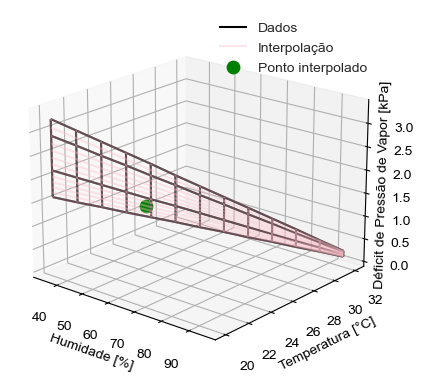

In [3]:
interpol = []

for index, humid in enumerate(HumidadeDados):
    interpol.append(f((HumidadeDados[index], TemperaturaDados)))

#Transformando os valores de VPD de strings em float
for index, vetor in enumerate(VPD):
    for index_vpd, vpd in enumerate(vetor):
        vetor[index_vpd] = float(vpd)

#Iniciando figura
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

#Plotando os dados coletados
ax.plot_wireframe(HumidadeDados, TemperaturaDados, VPD, rstride=5, cstride=1, color="k", label="Dados", alpha=1)

#Plotando interpolação realizada
ax.plot_wireframe(HumidadeDados,TemperaturaDados, np.array(interpol), color="pink", alpha=0.4, rstride=1, cstride=1, label="Interpolação")

#Plotando VPD desejado
ax.scatter(Humidade, Temperatura, f((Humidade,Temperatura)), color="g", s=80, label="Ponto interpolado")

#Configurando plot
plt.style.use('seaborn-v0_8')
plt.xlabel("Humidade [%]")
plt.ylabel("Temperatura [°C]")
ax.set_zlabel("Déficit de Pressão de Vapor [kPa]", labelpad=-14)
ax.view_init(20,-50) #angulação da vista
plt.legend(loc="best")
plt.show()

In [6]:
if cond == "vegetativo" or cond == "vega":
    
    if valor_vpd_calculado < 0.6:
        print("Valor de Déficit de pressão de vapor igual a {:.2f}. Há risco de haver fungo e doenças em sua planta =(".format(valor_vpd_calculado))
        
    elif valor_vpd_desejado < 1.1:
        print("Valor de Déficit de pressão de vapor igual a {:.2f}, o que é saudável para sua planta! Ela está transpirando e crescendo bem nessa Vega!! =)".format(valor_vpd_calculado))
    
    elif valor_vpd_desejado < 1.8:
        print("Valor de Déficit de pressão de vapor igual a {:.2f}, o que não é saudável para sua planta: ela está transpirando e crescendo mal nessa Vega!! =(".format(valor_vpd_calculado))
    
    else:
        print("Valor de Déficit de pressão de vapor igual a {:.2f}. Sua planta e está sobre alto stress e correndo perigo =(".format(valor_vpd_calculado))
        
elif cond == "floração" or cond == "flora" or cond == "floracao" or cond == "floraçao" or cond == "floracão":
    
    if valor_vpd_calculado < 0.6:
        print("Valor de Déficit de pressão de vapor igual a {:.2f}. Há risco de haver fungo e doenças em sua planta =(".format(valor_vpd_calculado))
    
    elif valor_vpd_calculado < 1.1:
        print("Valor de Déficit de pressão de vapor igual a {:.2f}, o que não é saudável para sua planta: ela está transpirando e crescendo mal nessa Flora!! =(".format(valor_vpd_calculado))
    
    elif valor_vpd_calculado < 1.8:
        print("Valor de Déficit de pressão de vapor igual a {:.2f}, o que é saudável para sua planta: ela está transpirando e crescendo bem nessa Flora!! =)".format(valor_vpd_calculado))
   
    else:
        print("Valor de Déficit de pressão de vapor igual a {:.2f}. Sua planta e está sobre alto stress e correndo perigo =(".format(valor_vpd_calculado))

Valor de Déficit de pressão de vapor igual a 0.97, o que não é saudável para sua planta: ela está transpirando e crescendo mal nessa Flora!! =(
